## Data Analytics

In [1]:
# Data Preparation and Exploration

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# Loading the dataset
data = pd.read_csv("dataset for assignment 2.csv")

# Displaying the the first few rows and basic statistics
data.head(7)

,User ID,Gender,Age,Activity Level,Location,App Sessions,Distance Travelled (km),Calories Burned
0,1,Female,22,Active,Suburban,151,140,728
1,2,Male,50,Active,Rural,157,115,523
2,3,Male,36,Active,Urban,178,163,795
3,4,Female,36,Active,Suburban,155,85,715
4,5,Male,34,Sedentary,Rural,95,71,439
5,6,Male,41,Sedentary,Suburban,80,60,197
6,7,Female,45,Sedentary,Urban,68,43,309


In [3]:
data.describe()

,User ID,Age,App Sessions,Distance Travelled (km),Calories Burned
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,38.423600,124.366400,92.550400,432.316000
std,1443.520003,12.160631,42.689317,36.746095,187.427426
min,1.000000,18.000000,50.000000,26.000000,102.000000
25%,1250.750000,28.000000,89.000000,63.000000,285.000000
50%,2500.500000,39.000000,124.000000,89.000000,406.000000
75%,3750.250000,49.000000,161.000000,118.000000,560.000000
max,5000.000000,59.000000,199.000000,195.000000,987.000000


## Data cleaning

In [4]:
# Check for null values
null_counts = data.isnull().sum()
print("Null Value Counts:")
print(null_counts)

Null Value Counts:
User ID                    0
Gender                     0
Age                        0
Activity Level             0
Location                   0
App Sessions               0
Distance Travelled (km)    0
Calories Burned            0
dtype: int64


In [5]:
# Checking if there are any missing values overall
if data.isnull().values.any():
    print("There are missing values in the dataset.")
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


# data encoding

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
# Encode 'Gender' column
label_encoder_gender = LabelEncoder()
data['Gender_Label'] = label_encoder_gender.fit_transform(data['Gender'])

# Encode 'Activity_Level' column
label_encoder_activity = LabelEncoder()
data['Activity_Level_Label'] = label_encoder_activity.fit_transform(data['Activity Level'])

# Encode 'Activity_Level' column
label_encoder_activity = LabelEncoder()
data['Location_Label'] = label_encoder_activity.fit_transform(data['Location'])

# Drop original categorical columns 
data.drop(['Gender', 'Activity Level', 'Location'], axis=1, inplace=True)

In [8]:
data.head(7)

,User ID,Age,App Sessions,Distance Travelled (km),Calories Burned,Gender_Label,Activity_Level_Label,Location_Label
0,1,22,151,140,728,0,0,1
1,2,50,157,115,523,1,0,0
2,3,36,178,163,795,1,0,2
3,4,36,155,85,715,0,0,1
4,5,34,95,71,439,1,2,0
5,6,41,80,60,197,1,2,1
6,7,45,68,43,309,0,2,2


# Data visualisation

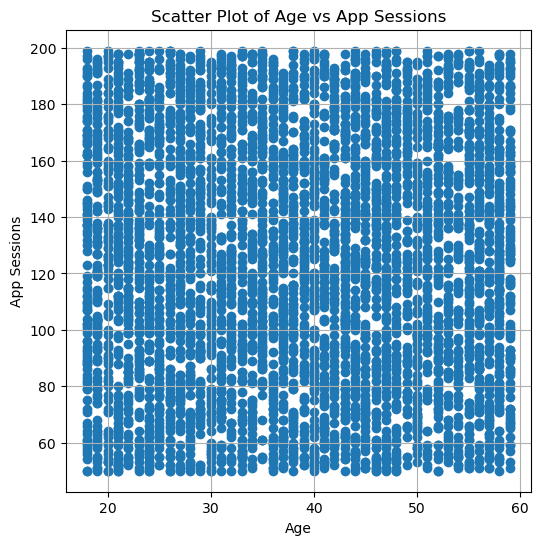

In [9]:
import matplotlib.pyplot as plt
# Scatter plot between Age and App_Sessions
plt.figure(figsize=(6, 6))
plt.scatter(data['Age'], data['App Sessions'])
plt.title('Scatter Plot of Age vs App Sessions')
plt.xlabel('Age')
plt.ylabel('App Sessions')
plt.grid(True)
plt.show()

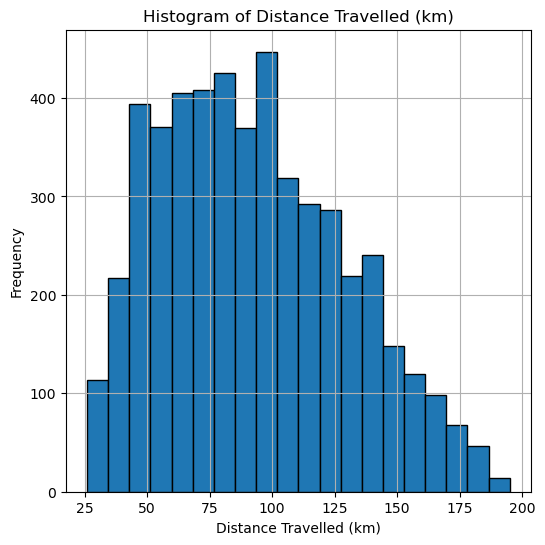

In [10]:
# Histogram of Distance_Travelled_km
plt.figure(figsize=(6, 6))
plt.hist(data['Distance Travelled (km)'], bins=20, edgecolor='black')
plt.title('Histogram of Distance Travelled (km)')
plt.xlabel('Distance Travelled (km)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

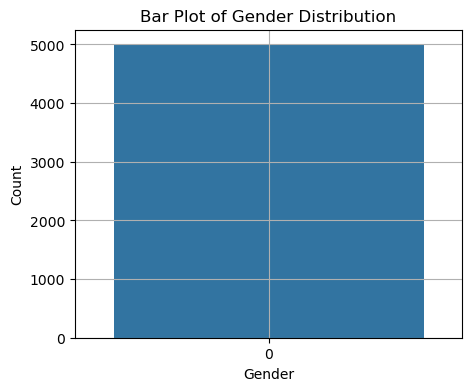

In [11]:
import seaborn as sns

#  Bar plot of Gender distribution
plt.figure(figsize=(5, 4))
sns.countplot(data['Gender_Label'])
plt.title('Bar Plot of Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True)
plt.show()

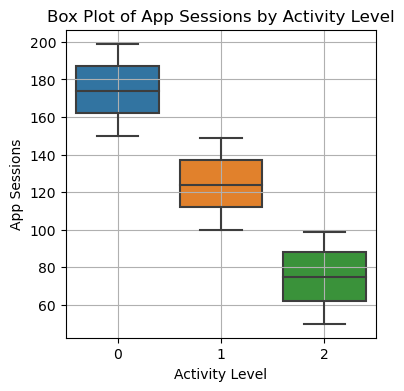

In [12]:
# Box plot of App_Sessions by Activity_Level
plt.figure(figsize=(4, 4))
sns.boxplot(x='Activity_Level_Label', y='App Sessions', data=data)
plt.title('Box Plot of App Sessions by Activity Level')
plt.xlabel('Activity Level')
plt.ylabel('App Sessions')
plt.grid(True)
plt.show()

In [13]:
# Correlation Analysis

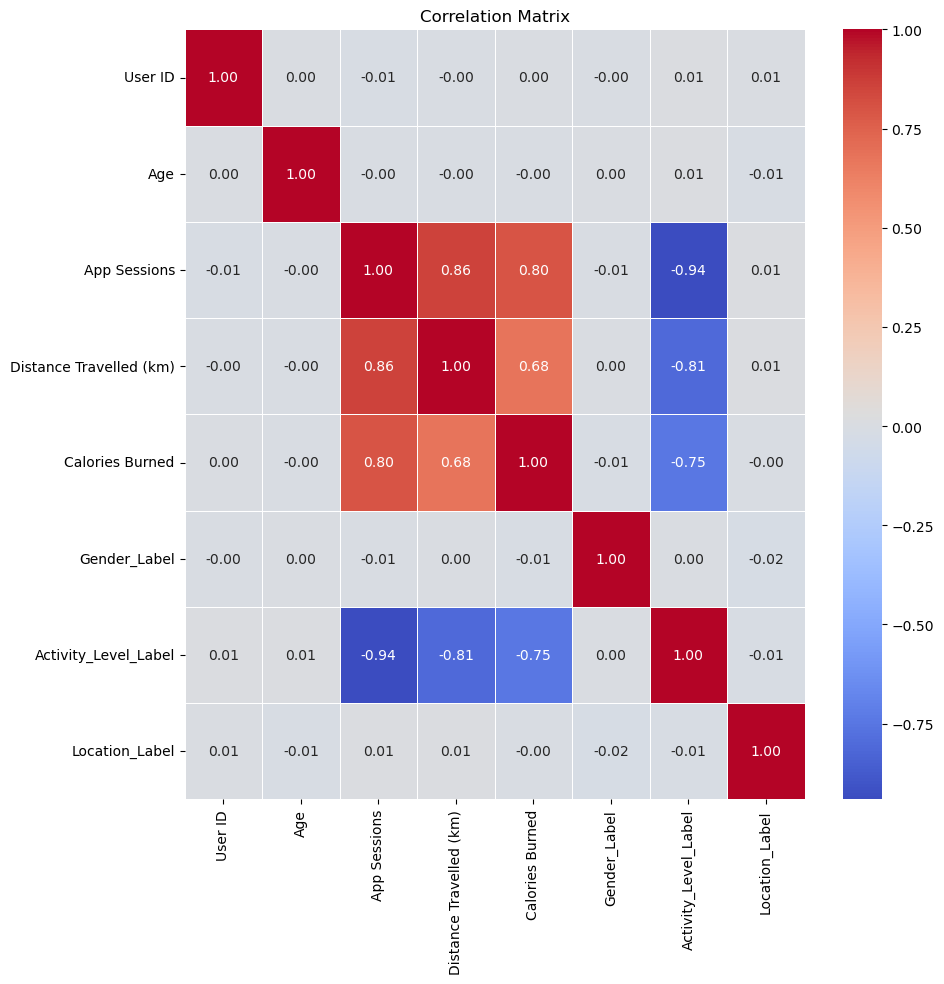

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculation of correlation matrix
correlation_matrix = data.corr()

# Plotting the heatmap of correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Multiple Regression

In [15]:
import statsmodels.api as sm

# Preparing the data for regression
X = sm.add_constant(data[['Age', 'Distance Travelled (km)', 'Calories Burned']])
y = data['App Sessions']

# Fitting the regression model
model_regression = sm.OLS(y, X)
results = model_regression.fit()

# Printing regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           App Sessions   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     7504.
Date:                Thu, 11 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:38:19   Log-Likelihood:                -21599.
No. Observations:                5000   AIC:                         4.321e+04
Df Residuals:                    4996   BIC:                         4.323e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

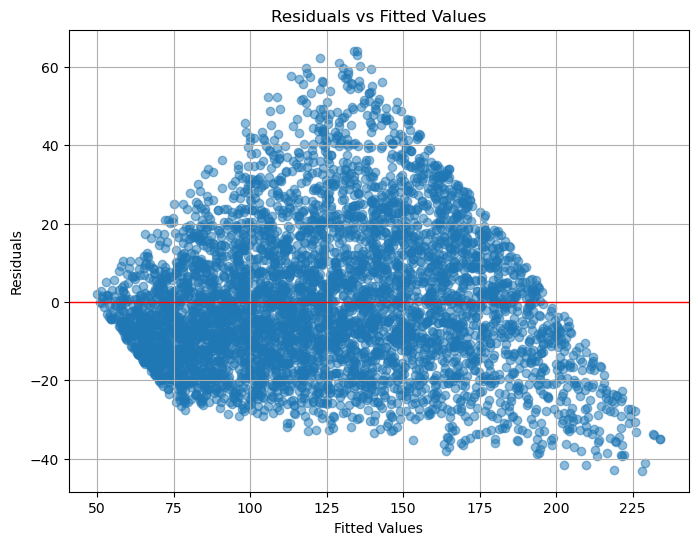

In [16]:
# Residuals vs Fitted Values Plot
plt.figure(figsize=(8, 6))
plt.scatter(results.fittedvalues, results.resid, alpha=0.5)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-', linewidth=1)
plt.grid(True)
plt.show()

In [17]:
# Extracting R-squared value
r_squared = results.rsquared
print(f"R-squared: {r_squared:.3f}")

R-squared: 0.818


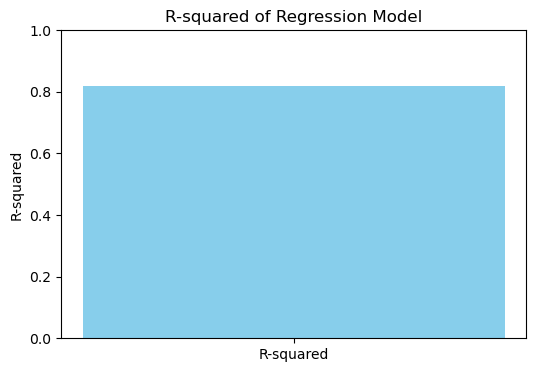

In [18]:
# Visualizing R-squared
plt.figure(figsize=(6, 4))
plt.bar(["R-squared"], [r_squared], color='skyblue')
plt.ylim(0, 1)  
plt.title('R-squared of Regression Model')
plt.ylabel('R-squared')
plt.show()

# Linear regression 

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# Define features and target variable
X = data[['Age', 'Distance Travelled (km)', 'Calories Burned']]
y = data['App Sessions']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Initialize and fit the linear regression model
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predict on the test set
y_pred = model_LR.predict(X_test)

In [23]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Print coefficients
print("Coefficients:", model_LR.coef_)
print("Intercept:", model_LR.intercept_)

Mean Squared Error: 331.92825117843216
R-squared: 0.8216633903895458
Coefficients: [0.00957531 0.68408315 0.09039971]
Intercept: 21.6563517127629


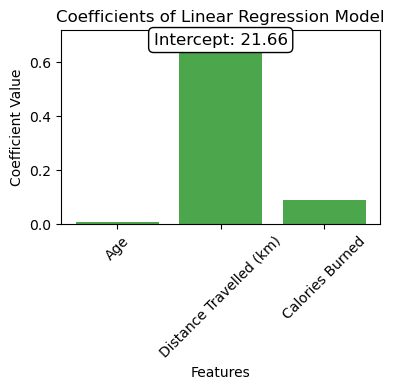

In [24]:
coefficients = model_LR.coef_
intercept = model_LR.intercept_
# Extract feature names 
feature_names = ['Age', 'Distance Travelled (km)', 'Calories Burned']
# Plotting the coefficients
plt.figure(figsize=(4, 4))
plt.bar(feature_names, coefficients, color='Green', alpha=0.7)
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Coefficients of Linear Regression Model')
plt.xticks(rotation=45)
plt.tight_layout()
# Adding the intercept value as a separate annotation
plt.annotate(f'Intercept: {intercept:.2f}', xy=(0.5, 0.95), xycoords='axes fraction',
             fontsize=12, ha='center', va='center', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black"))

plt.show()

# Confirmatory Factor Analysis (CFA)

In [25]:
#! pip install factor_analyzer

In [26]:
from factor_analyzer import FactorAnalyzer

# Confirmatory Factor Analysis (CFA) using factor_analyzer
cfa = FactorAnalyzer(rotation=None)
cfa.fit(data)

# Printing the factor loadings
print(cfa.loadings_)

[[-6.71966682e-03  1.00285019e-02  2.53080176e-02]
 [-4.58936713e-03 -2.23236352e-02 -9.46348258e-04]
 [ 9.96051316e-01  6.61878949e-03 -6.64177488e-02]
 [ 8.55039905e-01  9.45662600e-03 -6.58173546e-02]
 [ 8.14177124e-01 -2.61520498e-02  2.32749804e-01]
 [-5.03823945e-03 -4.08078940e-02 -2.79753576e-02]
 [-9.39190894e-01 -3.70377496e-04  7.15097268e-02]
 [ 1.11321050e-02  5.41266528e-01  1.06395687e-02]]


In [27]:
# evaluation of CFA

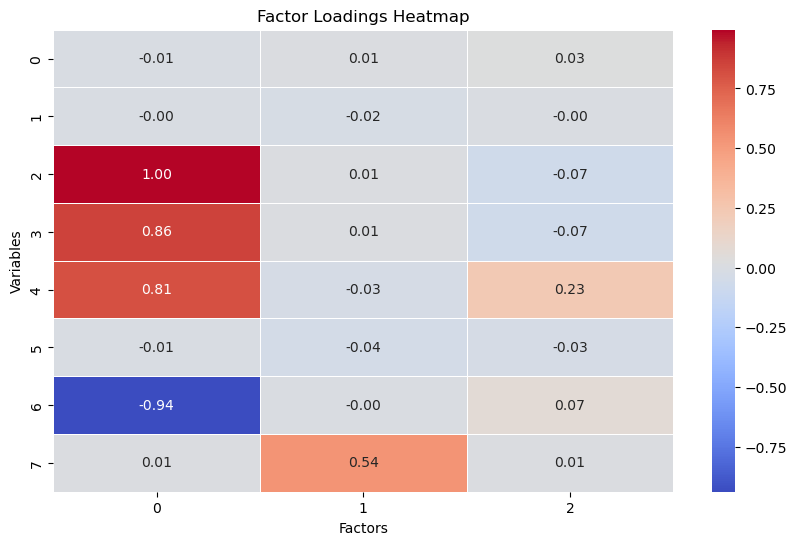

In [28]:
loadings = cfa.loadings_
# Plotting the heatmap of factor loadings
plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Factor Loadings Heatmap')
plt.xlabel('Factors')
plt.ylabel('Variables')
plt.show()

## KMeans Clustering Model

In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming 'data' is your DataFrame
X = data[['Age', 'User ID', 'Distance Travelled (km)', 'Calories Burned']]

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
data['Persona'] = kmeans.fit_predict(X_scaled)

# Get the centroids of the clusters
persona_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Create a DataFrame for the cluster centers
persona_df = pd.DataFrame(persona_centers, columns=X.columns)
print(persona_df)

         Age      User ID  Distance Travelled (km)  Calories Burned
0  38.154440  2501.979592               129.031440       618.190844
1  37.857769  1189.481203                71.984962       325.431704
2  39.297926  3813.952860                71.609051       327.725330


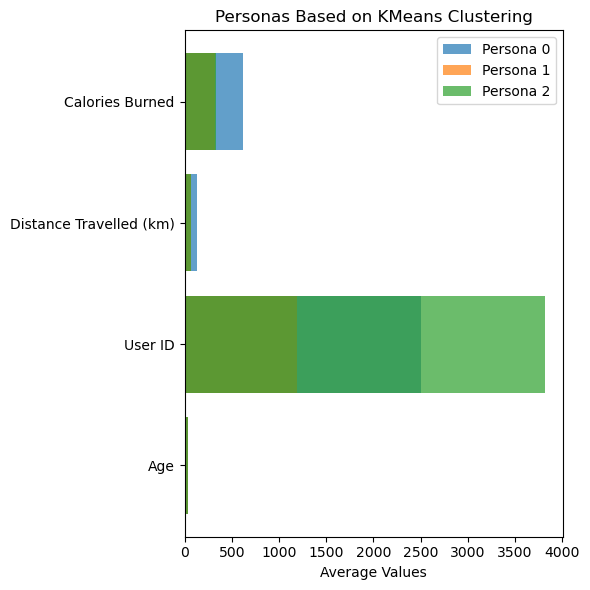

In [42]:
# Plotting the personas
plt.figure(figsize=(6, 6))
# Iterating over each persona and plotting
for i, persona in persona_df.iterrows():
    plt.barh(persona.index, persona.values, alpha=0.7, label=f'Persona {i}')
plt.xlabel('Average Values')
plt.title('Personas Based on KMeans Clustering')
plt.legend()
plt.tight_layout()
plt.show()